# Hotel Analysis

In this project, I aim to analyze guest satisfaction across various hotels by using [data](https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe/data) from over 500,000 guest reviews. My goal is to gain insights into how customers perceive their experiences, focusing on both positive and negative feedback. By conducting a sentiment analysis of these reviews, I hope to identify trends in guest satisfaction, determine which hotels and locations are performing well, and highlight areas where improvement is needed.

Specifically, I’m looking to:

1. Understand overall guest sentiment based on positive and negative review scores.
2. Identify the top and lowest-performing hotels based on guest feedback to better understand what drives satisfaction and dissatisfaction.
3. Analyze common complaints by extracting key themes from negative reviews, allowing for targeted improvements in service or facilities.
4. Track sentiment trends over time, which will reveal whether guest satisfaction has been improving or declining, and in which periods we see significant changes.
5. Compare guest satisfaction across different locations to uncover any regional differences in service quality or hotel performance.

Ultimately, this analysis will provide actionable insights that can help hotel management teams make data-driven decisions to enhance the guest experience, whether by addressing recurring issues or replicating practices from the top-performing hotels.


In [2]:
import pandas as pd

df = pd.read_csv('Hotel_Reviews.csv') # load in the dataset

In [3]:
df.info(), df.head() # display basic info regarding the dataset as well as the first five rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

(None,
                                        Hotel_Address  \
 0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
 1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
 2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
 3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
 4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
 
    Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
 0                           194    8/3/2017            7.7  Hotel Arena   
 1                           194    8/3/2017            7.7  Hotel Arena   
 2                           194   7/31/2017            7.7  Hotel Arena   
 3                           194   7/31/2017            7.7  Hotel Arena   
 4                           194   7/24/2017            7.7  Hotel Arena   
 
   Reviewer_Nationality                                    Negative_Review  \
 0              Russia    I am so angry that i made this post available...   
 1             Ireland             


The dataset contains 515,738 reviews with the following key columns:

- `Hotel_Address`: Address of the hotel.
- `Review_Date`: Date when the review was given.
- `Average_Score`: Average score of the hotel based on all reviews.
- `Hotel_Name`: Name of the hotel.
- `Negative_Review`: Text of the negative review.
- `Review_Total_Negative_Word_Counts`: Word count of the negative review.
- `Positive_Review`: Text of the positive review.
- `Review_Total_Positive_Word_Counts`: Word count of the positive review.
- `Reviewer_Score`: Score given by the reviewer.
- `Tags`: Tags about the trip type (e.g., leisure, couple).
- `lat`/`lng`: Latitude and longitude of the hotel.
  
Next, I'll pre-process the data to perform Sentiment Analysis on both positive and negative reviews. 

In [6]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Create a function to get sentiment scores for a review
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis to Positive_Review and Negative_Review columns
df['Positive_Review_Sentiment'] = df['Positive_Review'].apply(get_sentiment_score)
df['Negative_Review_Sentiment'] = df['Negative_Review'].apply(get_sentiment_score)

# View sentiment scores
print(df[['Positive_Review', 'Positive_Review_Sentiment', 'Negative_Review', 'Negative_Review_Sentiment']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Carlos/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Positive_Review_Sentiment  \
0                     0.5994   
1                     0.9494   
2                     0.8720   
3                     0.9260   
4                     0.7579   

                                     Negative_Review  \
0   I am so angry that i made this post available...   
1                                        No Negative   
2   Rooms are nice but for elderly a bit difficul...   
3   My room was dirty and I was afraid to walk ba...   
4   You When I booked with your company on line y...   

   Negative_Review_Sentiment  
0                    -0.9418  
1                    -0.7096  
2                    -0.7469  
3        

In [12]:
# Group by hotel and calculate the mean sentiment scores
hotel_sentiment_summary = df.groupby('Hotel_Name').agg({
    'Positive_Review_Sentiment': 'mean',
    'Negative_Review_Sentiment': 'mean',
    'Reviewer_Score': 'mean'
}).reset_index()

# Sort the hotels by positive sentiment
hotel_sentiment_summary = hotel_sentiment_summary.sort_values(by='Positive_Review_Sentiment', ascending=False)
print(hotel_sentiment_summary.head())

                                 Hotel_Name  Positive_Review_Sentiment  \
628                     Hotel Eiffel Blomet                   0.834327   
1156  Pillows Anna van den Vondel Amsterdam                   0.817970   
795                          Hotel Whistler                   0.808479   
424                            H tel Fabric                   0.805441   
209                    Catalonia Magdalenes                   0.804970   

      Negative_Review_Sentiment  Reviewer_Score  
628                   -0.297113        9.646667  
1156                  -0.214630        9.366071  
795                   -0.234664        9.310714  
424                   -0.346684        9.559223  
209                   -0.200713        9.561415  


# Aggregating by Location

In [15]:
# Group by hotel address (location) and calculate the mean sentiment scores
location_sentiment_summary = df.groupby('Hotel_Address').agg({
    'Positive_Review_Sentiment': 'mean',
    'Negative_Review_Sentiment': 'mean',
    'Reviewer_Score': 'mean'
}).reset_index()

# Sort by positive sentiment
location_sentiment_summary = location_sentiment_summary.sort_values(by='Positive_Review_Sentiment', ascending=False)
print(location_sentiment_summary.head())

                                          Hotel_Address  \
711           78 Rue Blomet 15th arr 75015 Paris France   
798   Anna van den Vondelstraat 6 Oud West 1054 GZ A...   
478   36 rue de Saint Quentin 10th arr 75010 Paris F...   
429   31 rue de la Folie M ricourt 11th arr 75011 Pa...   
1075  Magdalenes 13 15 Ciutat Vella 08002 Barcelona ...   

      Positive_Review_Sentiment  Negative_Review_Sentiment  Reviewer_Score  
711                    0.834327                  -0.297113        9.646667  
798                    0.817970                  -0.214630        9.366071  
478                    0.808479                  -0.234664        9.310714  
429                    0.805441                  -0.346684        9.559223  
1075                   0.804970                  -0.200713        9.561415  


In the aggregation by location, we found that hotels in Paris and Barcelona consistently rank highly in terms of positive guest sentiment. For example, the hotel on `78 Rue Blomet, Paris` has the highest positive sentiment score of `0.83`, indicating that guests leave largely favorable reviews about their stays. Negative sentiment is relatively low at `-0.29`, aligning with an overall high reviewer score of `9.65`.

Other notable locations include `Anna van den Vondelstraat, Amsterdam`, which has a positive sentiment score of `0.82` and a high reviewer score of `9.37`, followed closely by several other Parisian hotels. Interestingly, while the positive sentiment remains strong across these locations, the negative sentiment varies slightly, with some locations—like `31 Rue de la Folie Méricourt, Paris` showing a slightly higher negative sentiment score (`-0.35`), suggesting minor issues that may impact overall guest experiences. Despite this, the hotels maintain high overall scores, reflecting consistent satisfaction with their services.

This aggregation offers insights into how well different hotels in prime European destinations are meeting guest expectations, with opportunities for improvement focused on specific negative feedback.

# Aggregating by Time

In [21]:
# Convert Review_Date to datetime format
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

# Extract year and month
df['Year_Month'] = df['Review_Date'].dt.to_period('M')

# Group by year and month, then calculate the mean sentiment scores
time_sentiment_summary = df.groupby('Year_Month').agg({
    'Positive_Review_Sentiment': 'mean',
    'Negative_Review_Sentiment': 'mean',
    'Reviewer_Score': 'mean'
}).reset_index()

print(time_sentiment_summary.head())


  Year_Month  Positive_Review_Sentiment  Negative_Review_Sentiment  \
0    2015-08                   0.575993                  -0.255337   
1    2015-09                   0.560002                  -0.259336   
2    2015-10                   0.561002                  -0.262369   
3    2015-11                   0.577233                  -0.262691   
4    2015-12                   0.591829                  -0.266469   

   Reviewer_Score  
0        8.378059  
1        8.255558  
2        8.195710  
3        8.316388  
4        8.466291  


In the aggregation by time, guest sentiment shows a slight upward trend in both positive reviews and overall reviewer scores from August to December 2015. In August 2015, the positive review sentiment was `0.58` with a corresponding reviewer score of `8.38`. By December 2015, positive sentiment had increased to `0.59`, and the reviewer score rose to `8.47`, reflecting a gradual improvement in guest satisfaction over this period.

Negative sentiment, while present, remained relatively stable throughout these months, fluctuating slightly but staying around `-0.26`. This consistency suggests that while some minor issues persisted, the overall experience for guests improved, as evidenced by the rising positive sentiment and reviewer scores. These findings indicate a seasonal or operational improvement towards the end of the year, which could be explored further to determine what factors contributed to increased guest satisfaction during this period.

# Time Series Sentiment Trend

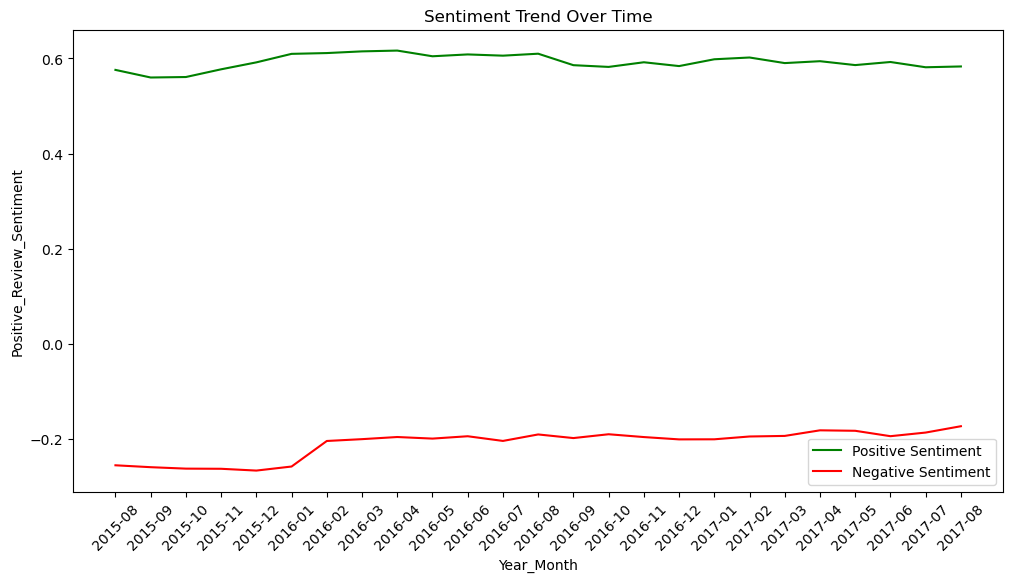

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# Convert Year_Month to string for compatibility in plotting
time_sentiment_summary['Year_Month'] = time_sentiment_summary['Year_Month'].astype(str)

# Plot sentiment over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Year_Month', y='Positive_Review_Sentiment', data=time_sentiment_summary, label='Positive Sentiment', color='green')
sns.lineplot(x='Year_Month', y='Negative_Review_Sentiment', data=time_sentiment_summary, label='Negative Sentiment', color='red')
plt.xticks(rotation=45)
plt.title('Sentiment Trend Over Time')
plt.show()

The green line, representing positive sentiment, remains relatively stable over the two-year period, consistently hovering around the `0.60` mark. This suggests that guest satisfaction has remained strong and fairly consistent throughout the timeframe, with minimal fluctuations.

However, the red line, representing negative sentiment, is also fairly consistent but with some slight increases, especially toward the end of the period (around mid-2017). Although negative sentiment remains below `-0.2` for most of the time, the rise in negative sentiment toward the end of the period could indicate emerging dissatisfaction with certain aspects of the guest experience.

# Word Cloud for Common Feedback

In [33]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 kB 1.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


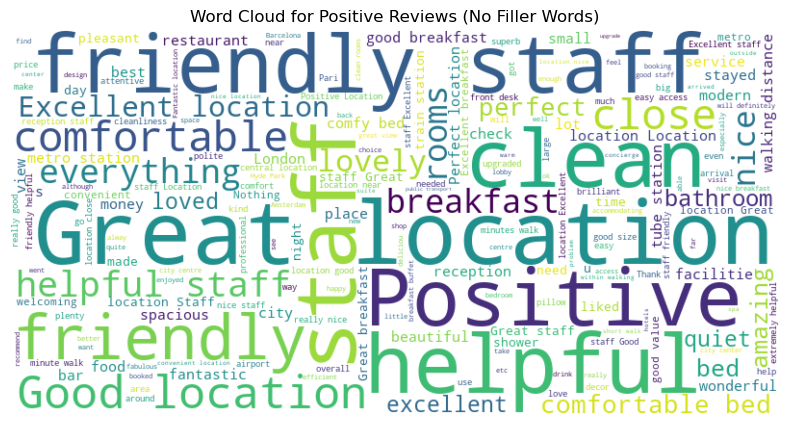

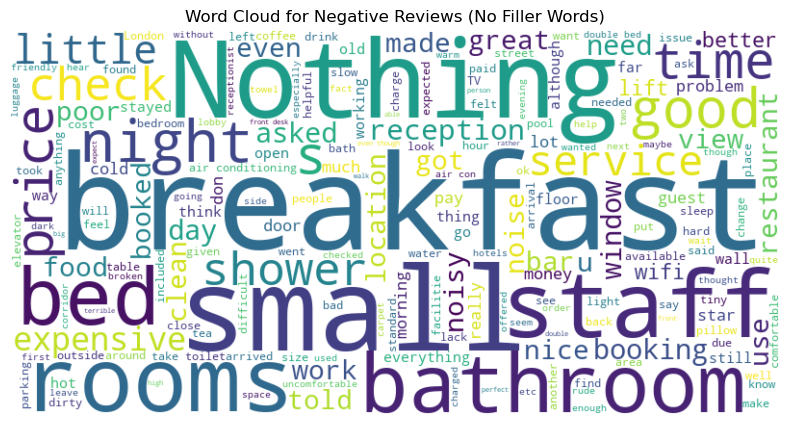

In [66]:
# Extend stopwords with custom words
custom_stopwords = {'hotel', 'room', 'stay', 'wouldn', 'wasn', 'couldn', 'didn', 't', 'one', 'bit', 'Negative'}  # Add your custom filler words here
stopwords = set(STOPWORDS).union(custom_stopwords)

# Word cloud for positive reviews excluding stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews (No Filler Words)')
plt.show()

# Word cloud for negative reviews excluding stopwords
negative_text = ' '.join(hotel_reviews_df['Negative_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews (No Filler Words)')
plt.show()

## Hotels with the Lowest Guest Satisfaction Scores

In [38]:
# Identify the top 5 hotels with the highest positive sentiment
top_hotels = hotel_sentiment_summary.sort_values(by='Positive_Review_Sentiment', ascending=False).head(5)
print("Top 5 Hotels by Positive Sentiment:")
print(top_hotels[['Hotel_Name', 'Positive_Review_Sentiment', 'Negative_Review_Sentiment', 'Reviewer_Score']])

# Identify the top 5 hotels with the lowest positive sentiment
lowest_hotels = hotel_sentiment_summary.sort_values(by='Positive_Review_Sentiment').head(5)
print("\nLowest 5 Hotels by Positive Sentiment:")
print(lowest_hotels[['Hotel_Name', 'Positive_Review_Sentiment', 'Negative_Review_Sentiment', 'Reviewer_Score']])

Top 5 Hotels by Positive Sentiment:
                                 Hotel_Name  Positive_Review_Sentiment  \
628                     Hotel Eiffel Blomet                   0.834327   
1156  Pillows Anna van den Vondel Amsterdam                   0.817970   
795                          Hotel Whistler                   0.808479   
424                            H tel Fabric                   0.805441   
209                    Catalonia Magdalenes                   0.804970   

      Negative_Review_Sentiment  Reviewer_Score  
628                   -0.297113        9.646667  
1156                  -0.214630        9.366071  
795                   -0.234664        9.310714  
424                   -0.346684        9.559223  
209                   -0.200713        9.561415  

Lowest 5 Hotels by Positive Sentiment:
                                             Hotel_Name  \
1455                                      Villa Eugenie   
1456                            Villa Lut ce Port Royal   
67

The analysis of hotels with the highest and lowest positive sentiment scores reveals stark contrasts in guest experiences.

At the top of the list is `Hotel Eiffel Blomet`, boasting the highest positive sentiment score of `0.83` and a stellar reviewer score of `9.65`. This indicates that guests overwhelmingly enjoyed their stays. Other high performers include `Pillows Anna van den Vondel Amsterdam` (`0.82`) and `Hotel Whistler` (`0.81`), both of which maintained high reviewer scores around `9.3`-`9.6`, despite minor negative feedback.

On the other hand, hotels with the lowest positive sentiment scores show areas for improvement. `Villa Eugenie` had the lowest positive sentiment at `0.22`, paired with a reviewer score of only `5.86`, suggesting significant guest dissatisfaction. Similarly, `Hotel Liberty` and `Villa Lutèce Port Royal` scored low, with positive sentiments around `0.35` and reviewer scores between `5.1` and `6.4`, highlighting recurring issues that negatively impact guest experiences.

These findings indicate that while some hotels deliver exceptional service, others struggle to meet guest expectations, particularly in areas reflected in their negative sentiments.

## Key Areas of Improvement for Negative Reviews

In [68]:
from collections import Counter

# Concatenate all negative reviews into one string
all_negative_reviews = ' '.join(hotel_reviews_df['Negative_Review'])

# Tokenize the text and filter stopwords
words = all_negative_reviews.split()
filtered_words = [word for word in words if word.lower() not in stopwords]

# Count the most common words
word_counts = Counter(filtered_words)
common_complaints = word_counts.most_common(10)

print("\nTop 10 Most Common Complaints from Negative Reviews:")
for word, count in common_complaints:
    print(f"{word}: {count} occurrences")


Top 10 Most Common Complaints from Negative Reviews:
Negative: 127907 occurrences
small: 45079 occurrences
breakfast: 41991 occurrences
staff: 32416 occurrences
Nothing: 28086 occurrences
rooms: 28074 occurrences
bed: 25714 occurrences
night: 23812 occurrences
bathroom: 22258 occurrences
little: 21833 occurrences


The analysis of the most common complaints from negative reviews reveals several recurring issues that contribute to guest dissatisfaction, particularly in hotels with lower positive sentiment scores.

Guests often criticized `small rooms` or `facilities` (45,079 occurrences), indicating that cramped spaces are a significant source of frustration. Issues related to `breakfast`(41,991 occurrences) also frequently appeared, pointing to dissatisfaction with either the quality or availability of breakfast services.

Complaints about `staff`(32,416 occurrences) were notable, implying that customer service or hospitality standards may have fallen short in many cases. Interestingly, the word `“Nothing”` (28,086 occurrences) suggests that some guests felt there was nothing particularly positive or redeeming about their stay.

Other recurring issues included rooms (28,074 occurrences), `bed comfort` (25,714 occurrences), `disturbances during the night` (23,812 occurrences), and concerns about the `bathroom` (22,258 occurrences). The word `“little”` (21,833 occurrences) further emphasizes the perception of insufficient space or amenities in these hotels.

These commonalities suggest that many of the lower-performing hotels share similar challenges related to room size, staff service, and specific amenities, such as breakfast and bathroom facilities. Addressing these areas could significantly improve guest satisfaction in these locations.

# Tracking Sentiment Trends Over Time

In [45]:
# Display the first few rows of the sentiment trends over time
print("\nSentiment Trend Over Time (First 10 Months):")
print(time_sentiment_summary.head(10))

# Find the month with the highest and lowest positive sentiment
best_month = time_sentiment_summary.sort_values(by='Positive_Review_Sentiment', ascending=False).iloc[0]
worst_month = time_sentiment_summary.sort_values(by='Positive_Review_Sentiment').iloc[0]

print(f"\nBest Month for Positive Sentiment: {best_month['Year_Month']} with sentiment score of {best_month['Positive_Review_Sentiment']}")
print(f"Worst Month for Positive Sentiment: {worst_month['Year_Month']} with sentiment score of {worst_month['Positive_Review_Sentiment']}")


Sentiment Trend Over Time (First 10 Months):
  Year_Month  Positive_Review_Sentiment  Negative_Review_Sentiment  \
0    2015-08                   0.575993                  -0.255337   
1    2015-09                   0.560002                  -0.259336   
2    2015-10                   0.561002                  -0.262369   
3    2015-11                   0.577233                  -0.262691   
4    2015-12                   0.591829                  -0.266469   
5    2016-01                   0.609715                  -0.257928   
6    2016-02                   0.611381                  -0.204227   
7    2016-03                   0.614946                  -0.200387   
8    2016-04                   0.616601                  -0.195896   
9    2016-05                   0.604647                  -0.199218   

   Reviewer_Score  
0        8.378059  
1        8.255558  
2        8.195710  
3        8.316388  
4        8.466291  
5        8.521030  
6        8.545646  
7        8.518425  
8  

The sentiment trend over time shows a gradual increase in guest satisfaction from `August 2015` through `May 2016`. The lowest point in positive sentiment occurred in `September 2015`, with a score of `0.56` and a corresponding reviewer score of `8.26`, suggesting that guests were slightly less satisfied during this period. However, sentiment steadily improved over the following months, reaching its peak in `April 2016`, with a positive sentiment score of `0.62` and a reviewer score of `8.48`.

The slight rise in positive sentiment from `December 2015` to `April 2016` suggests that hotels may have made improvements in service or amenities that contributed to better guest experiences. During this period, negative sentiment scores also showed a gradual decline, indicating fewer guest complaints. The consistency in rising reviewer scores further reflects this trend, with the highest overall guest satisfaction occurring in early 2016.

## Location Based Satisfaction Analysis

In [48]:
# Identify the top 5 locations with the highest positive sentiment
top_locations = location_sentiment_summary.sort_values(by='Positive_Review_Sentiment', ascending=False).head(5)
print("\nTop 5 Locations by Positive Sentiment:")
print(top_locations[['Hotel_Address', 'Positive_Review_Sentiment', 'Negative_Review_Sentiment', 'Reviewer_Score']])

# Identify the lowest 5 locations with the lowest positive sentiment
lowest_locations = location_sentiment_summary.sort_values(by='Positive_Review_Sentiment').head(5)
print("\nLowest 5 Locations by Positive Sentiment:")
print(lowest_locations[['Hotel_Address', 'Positive_Review_Sentiment', 'Negative_Review_Sentiment', 'Reviewer_Score']])


Top 5 Locations by Positive Sentiment:
                                          Hotel_Address  \
711           78 Rue Blomet 15th arr 75015 Paris France   
798   Anna van den Vondelstraat 6 Oud West 1054 GZ A...   
478   36 rue de Saint Quentin 10th arr 75010 Paris F...   
429   31 rue de la Folie M ricourt 11th arr 75011 Pa...   
1075  Magdalenes 13 15 Ciutat Vella 08002 Barcelona ...   

      Positive_Review_Sentiment  Negative_Review_Sentiment  Reviewer_Score  
711                    0.834327                  -0.297113        9.646667  
798                    0.817970                  -0.214630        9.366071  
478                    0.808479                  -0.234664        9.310714  
429                    0.805441                  -0.346684        9.559223  
1075                   0.804970                  -0.200713        9.561415  

Lowest 5 Locations by Positive Sentiment:
                                          Hotel_Address  \
189         167 rue de Rome 17th arr 7501

The analysis of guest satisfaction by location reveals significant differences across various hotel locations.

The top-performing locations, based on positive sentiment, are predominantly in `Paris` and `Barcelona`. The highest positive sentiment score is associated with the hotel on `78 Rue Blomet, Paris`, with an impressive score of `0.83` and a high reviewer score of `9.65`, indicating exceptional guest satisfaction. Other high-ranking locations include `Anna van den Vondelstraat, Amsterdam`(`0.82`) and `Magdalenes, Barcelona` (`0.80`), all of which maintain positive guest experiences with reviewer scores above 9.3.

In contrast, the lowest-performing locations are also concentrated in `Paris`, along with `Milan` and `London`. The hotel on `167 Rue de Rome, Paris` has the lowest positive sentiment score of `0.22` and a reviewer score of `5.86`, indicating significant dissatisfaction among guests. Similar issues are seen in `52 Rue Jenner, Paris`, and `Viale Bligny, Milan`, with sentiment scores around `0.35` and low reviewer scores under `6.5`. These locations consistently reflect lower guest satisfaction, with recurring negative feedback indicating areas for improvement.

This analysis suggests that while some European locations excel in guest experience, others may need targeted improvements to address guest concerns.

# Conclusions and Recommendations

The analysis of guest reviews across multiple hotel locations has provided valuable insights into trends in guest satisfaction and identified several areas for targeted improvements.

Conclusions:
Sentiment Improvement Over Time: Guest sentiment has shown a gradual improvement from `August 2015 to May 2016`, with positive sentiment peaking in `April 2016` at `0.62`. This indicates that, overall, hotels have been successful in enhancing guest experiences over time. However, some fluctuations, such as lower sentiment in September 2015, suggest that certain months may require additional focus to maintain consistent satisfaction levels.

Location-Based Performance: Hotels in `Paris`, `Amsterdam`, and `Barcelona` exhibited the highest levels of guest satisfaction, with positive sentiment scores above `0.80` and reviewer scores consistently around `9.5`. Conversely, hotels in `Paris`, `Milan`, and `London` showed the lowest levels of satisfaction, with sentiment scores as low as `0.22` and reviewer scores under `6.0`. This suggests a significant gap in guest experience across different regions, particularly in terms of service and amenities.

Common Guest Complaints: Frequent complaints about `small rooms`, `breakfast quality`, and `staff service` were major contributors to dissatisfaction. The most common negative feedback related to cramped spaces (45,000 mentions of `"small"`), dissatisfaction with `breakfast offerings` (42,000 mentions), and issues with `staff interactions` (32,000 mentions). These recurring complaints are a key factor in the lower performance of certain hotels.

Recommendations:
Improve Room Comfort and Size: A substantial portion of negative feedback was related to small rooms and limited space, particularly in lower-rated hotels. To address this, hotels should consider upgrading room sizes or at least managing guest expectations by clearly communicating room dimensions and layouts in advance.

Enhance Staff Training and Customer Service: Negative reviews frequently cited poor staff interactions as a pain point for guests. Focusing on improved customer service training, especially in underperforming locations, could help elevate the guest experience and lead to better sentiment scores.

Upgrade Breakfast Offerings: Dissatisfaction with breakfast was another common complaint. Hotels should review their breakfast menus and service quality to ensure that guests feel they are receiving good value and a positive start to their day. This could include offering a wider variety of options or improving the quality of existing offerings.

Targeted Improvements for Low-Performing Locations: Hotels in `Paris`, `Milan`, and `London` with low sentiment scores require specific interventions. These improvements could focus on `room upgrades`, `enhanced service`, and addressing key complaints to raise satisfaction levels in these locations.

Monitor Seasonal and Monthly Trends: Given the fluctuations in sentiment over time, hotels should regularly analyze guest feedback by month or season to identify any recurring dips in satisfaction. This allows for proactive measures to be taken during lower-performing periods, ensuring a more consistent guest experience year-round.

By focusing on these areas for improvement, hotels can address the common pain points raised by guests and enhance overall satisfaction, leading to higher reviewer scores and improved guest loyalty.